<a href="https://colab.research.google.com/github/matthewchung74/segmed/blob/main/Segmed_Sample_Dicom_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://images.squarespace-cdn.com/content/v1/5e5db7f1ded5fc06a4e9628b/1621962211656-VRF2N22QPR0HWGVJHG7G/logo+black.png?format=300w)
### Segmed Sample Dicom Dataset
<br>
👋 Hello there - we’re glad you found us! 
<br>
<br>
This sample deidentified dataset is an example of what's available on Segmed Insight - **our proprietary platform with nearly 10 million reports**.

[Schedule a demo to learn more and gain access to Insight](https://calendly.com/d/dr3-5n8-mjd/segmed-demo-request).
<br>
<br>
This notebook contains chest x-ray reports and dicom images.
<br>
<br>
In addition to the Insight platform, there’s a concierge team that can help source data if you can’t find what you’re looking for. Contact Aline at aline@segmed.ai if you have any questions.
<br>
<br>
We pride ourselves on getting quality data to people like you faster than any other platform or option on the market. 

Modalities available at [Segmed.ai](https://segmed.ai) are:

*   Mammo
*   Ultrasound
*   CT
*   PET
*   X-ray
*   MR
*   10+ available

Body parts available include:
* Head/Neck
* Brain/Head 
* Breast
* Cardiac
* Liver/spleen
* Aorta
* 50+ available

[Schedule a demo](https://calendly.com/d/dr3-5n8-mjd/segmed-demo-request), and we’ll help you build better products!

### Install and import dependencies

First let's install dependencies so we can view the dicoms. This tutorial will make use [pydicom](https://github.com/pydicom/pydicom).

In [ ]:
!pip install -q pydicom

     |████████████████████████████████| 2.0 MB 7.2 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from glob import glob
import pydicom
import os
from PIL import Image

### Download dataset and summary file

Every dataset downloaded from segmed consists of a summary file and zip of data, based on the dataset name. Let's download and unpack this dataset.

In [ ]:
dataset_name = 'Segmed-samples'
!wget -nc https://dices.s3.amazonaws.com/{dataset_name}-summary.csv
!wget -nc https://dices.s3.amazonaws.com/{dataset_name}.zip
!unzip -q "{dataset_name}.zip" -d ./dataset

--2022-07-05 23:33:29--  https://dices.s3.amazonaws.com/Segmed-samples-summary.csv
Resolving dices.s3.amazonaws.com (dices.s3.amazonaws.com)... 52.217.137.81
Connecting to dices.s3.amazonaws.com (dices.s3.amazonaws.com)|52.217.137.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2583 (2.5K) [text/csv]
Saving to: ‘Segmed-samples-summary.csv’

Segmed-samples-summ 100%[===================>]   2.52K  --.-KB/s    in 0s      

2022-07-05 23:33:30 (24.7 MB/s) - ‘Segmed-samples-summary.csv’ saved [2583/2583]

--2022-07-05 23:33:30--  https://dices.s3.amazonaws.com/Segmed-samples.zip
Resolving dices.s3.amazonaws.com (dices.s3.amazonaws.com)... 52.217.137.81
Connecting to dices.s3.amazonaws.com (dices.s3.amazonaws.com)|52.217.137.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54253204 (52M) [application/zip]
Saving to: ‘Segmed-samples.zip’

Segmed-samples.zip  100%[===================>]  51.74M  30.7MB/s    in 1.7s    

2022-07-05 23:33:3

The summary file contains the study id and the medical report for each of the studies. You can see from the following that there are 5 studies downloaded in this dataset, each with about 2 dicoms per study and deidentified report.

In [ ]:
df = pd.DataFrame(pd.read_csv(f'{dataset_name}-summary.csv'), columns=['Study ID', 'Report'])

dicoms_in_study_length = []
dicoms = []
for study_id in df['Study ID'].to_numpy():
  dicoms_in_study = glob(f'dataset/Segmed-samples/{study_id}/**/*.dcm', recursive=True)
  dicoms_in_study_length.append(len(dicoms_in_study))
  dicoms.append(dicoms_in_study)
df['Num Dicoms'] = dicoms_in_study_length
df[['Report', 'Num Dicoms']]

,Report,Num Dicoms
0,CHEST 2 VIEWS Indication: Lower chest pain Com...,3
1,CHEST 2 VIEWS Clinical information: Smoking hi...,2
2,"X-RAY, CHEST 2 VIEWS, FRONTAL AND LATERAL X-RA...",2
3,XRAY CHEST PA & LATERAL (71020) History: Colon...,2


### Exploratory Data Analysis

Let's first visualize the images. As you can see, there are 4 dicom images with the original formatting and resolution from the radiology clinic. 

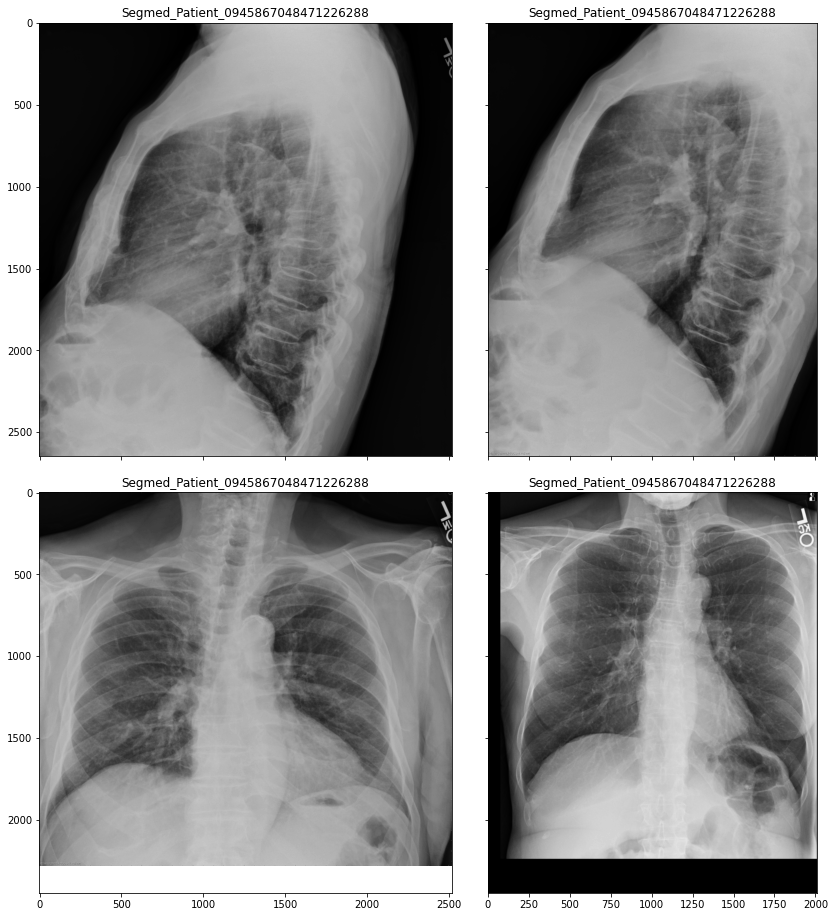

In [ ]:
ds_array = []
for dicom_path in list(np.concatenate(dicoms).flat):
  ds = pydicom.dcmread(dicom_path, force=False)
  ds.BitsStored = 16
  ds_array.append(ds)

fig = plt.figure(figsize=(16., 16.))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(2, 2),  
                 axes_pad=0.5,  
                 )

for ax, im in zip(grid, [ds.pixel_array.astype(float) for ds in ds_array]):
    ax.set_title(ds.data_element('PatientName').value)
    ax.imshow(im, cmap='gray')

Let's take a look at the entire dicom contents of the first dicom. Notice several fields contain Segmed_ tags for deidentification purposes.

And finally let's review the metadata for the first dicom.

In [ ]:
ds_array[0]

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 208
(0002, 0001) File Meta Information Version       OB: b'0 1\x00'
(0002, 0002) Media Storage SOP Class UID         UI: Computed Radiography Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.55648.238730440506976913297783273012907469553.7.1
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.55648.0.1.667.0
(0002, 0013) Implementation Version Name         SH: 'Segmed_v1.667.0'
-------------------------------------------------
(0008, 0016) SOP Class UID                       UI: Computed Radiography Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.55648.238730440506976913297783273012907469553.7.1
(0008, 0020) Study Date                          DA: '20150809'
(0008, 0030) Study Time                          TM: '102115.000'
(0008, 0050)